# Exploratory Data Analysis on Fire Related Datasets

## FIRMS Data Analysis and Cleaning

In [ ]:
import pandas as pd

df_firms = pd.read_parquet("firms_colorado_2015_2025.parquet")

In [12]:
# General Information
df_firms.info()
df_firms.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84110 entries, 0 to 84109
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   latitude    84110 non-null  float64       
 1   longitude   84110 non-null  float64       
 2   acq_date    84110 non-null  datetime64[ns]
 3   frp         84110 non-null  float64       
 4   confidence  84110 non-null  object        
 5   daynight    84110 non-null  object        
 6   year        84110 non-null  int32         
 7   month       84110 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(2)
memory usage: 4.5+ MB


,latitude,longitude,acq_date,frp,year,month
count,84110.000000,84110.000000,84110,84110.000000,84110.000000,84110.000000
mean,39.360178,-106.375333,2018-11-26 09:26:46.325050624,50.433912,2018.318309,7.559458
min,36.992760,-109.060210,2015-01-14 00:00:00,0.000000,2015.000000,1.000000
25%,38.225610,-107.823948,2016-09-28 00:00:00,3.460000,2016.000000,6.000000
50%,39.595025,-106.431400,2018-07-21 00:00:00,13.100000,2018.000000,8.000000
75%,40.565900,-105.310663,2020-09-15 00:00:00,40.760000,2020.000000,9.000000
max,41.003430,-102.042820,2024-12-31 00:00:00,2911.700000,2024.000000,12.000000
std,1.247105,1.606233,NaN,145.163194,2.273981,2.347753


In [13]:
df_firms.head()

,latitude,longitude,acq_date,frp,confidence,daynight,year,month
0,39.8052,-105.5512,2015-01-14,10.9,59,D,2015,1
1,40.7644,-105.5743,2015-01-14,16.2,72,D,2015,1
2,39.2396,-103.5525,2015-01-20,25.8,62,D,2015,1
3,38.1133,-103.9202,2015-02-06,51.4,93,D,2015,2
4,38.7417,-108.1359,2015-02-06,11.8,74,D,2015,2


In [8]:
# Any missing values
print(df_firms.isna().sum())

# Time coverage
df_firms['acq_date'].min(), df_firms['acq_date'].max()

latitude      0
longitude     0
acq_date      0
frp           0
confidence    0
daynight      0
dtype: int64


(Timestamp('2015-01-14 00:00:00'), Timestamp('2024-12-31 00:00:00'))

In [9]:
# Counts by year and month
df_firms['year'] = df_firms['acq_date'].dt.year
df_firms['month'] = df_firms['acq_date'].dt.month
df_firms.groupby('year').size()
df_firms.groupby(['year','month']).size().unstack(fill_value=0)


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,36,432,1560,936,252,396,192,228,648,1092,708,48
2016,252,348,984,648,504,2484,6252,1152,1992,2136,336,84
2017,48,408,1476,828,456,1428,1740,348,2232,1248,912,780
2018,0,0,0,204,136,3628,3219,3121,2168,110,245,104
2019,59,107,101,148,168,226,259,308,628,689,93,81
2020,84,80,156,196,347,478,193,8098,3726,9224,122,99
2021,72,41,159,128,205,998,734,191,113,160,73,156
2022,34,59,126,428,173,133,97,122,174,230,67,69
2023,47,43,66,185,156,139,184,516,753,429,122,120


* The confidence variable is an `object` type, for further analysis, it will be beneficial to convert this into numeric categories. 
* It also appears that the FRP goes up to 2900, but the mean is around 50. So there are likely many outliers in the dataset that should be filtered out. 
* To better compare with the GFW and Climate Data Store datasets, it is also worth aggregating these detections by month.

In [32]:
# Convert "confidence"  to numeric categories
# 0: low, 50: nominal, 100: high
confidence_map = {'l': 0, 'n': 50, 'h': 100}
df_firms['confidence'] = df_firms['confidence'].replace(confidence_map).astype(float)

In [33]:
# Aggreagate by day
fires_daily = df_firms.groupby('acq_date').agg(
    fire_count=('frp','count'),
    mean_frp=('frp','mean')
).reset_index()

In [37]:
# Filter outliers from frp
df_firms = df_firms[df_firms['frp'] < 500]

df_firms.describe()

,latitude,longitude,acq_date,frp,confidence,year,month
count,82844.000000,82844.000000,82844,82844.000000,82844.000000,82844.000000,82844.000000
mean,39.354512,-106.375473,2018-12-07 03:27:01.225435904,36.475782,61.854956,2018.347122,7.565786
min,36.992760,-109.060210,2015-01-14 00:00:00,0.000000,0.000000,2015.000000,1.000000
25%,38.216825,-107.832302,2016-10-13 00:00:00,3.380000,50.000000,2016.000000,6.000000
50%,39.589015,-106.433345,2018-07-31 00:00:00,12.780000,50.000000,2018.000000,8.000000
75%,40.554662,-105.301610,2020-09-18 00:00:00,38.800000,76.000000,2020.000000,9.000000
max,41.003430,-102.042820,2024-12-31 00:00:00,499.430000,100.000000,2024.000000,12.000000
std,1.245382,1.611554,NaN,63.587837,19.636012,2.275946,2.354111


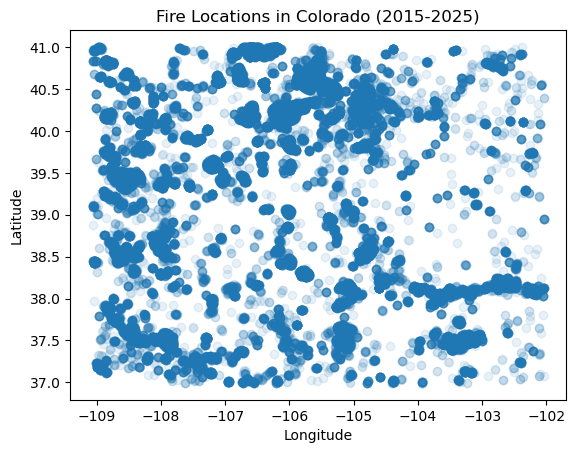

In [39]:
# Scatter Plot of lat/lon
import matplotlib.pyplot as plt
plt.scatter(df_firms['longitude'], df_firms['latitude'], alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations in Colorado (2015-2025)')
plt.show()

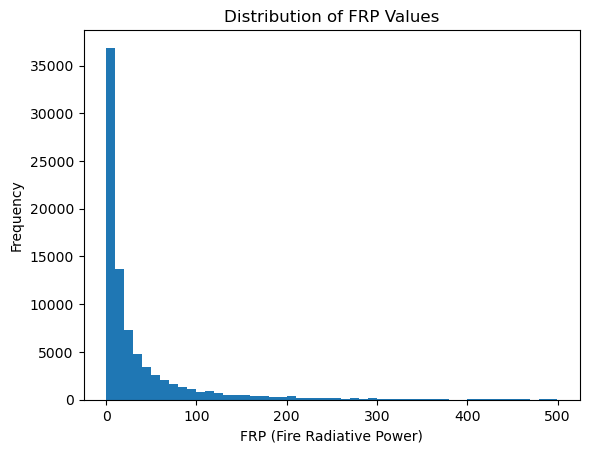

In [90]:
# FRP (fire radiative power) distribution
df_firms['frp'].describe()
plt.hist(df_firms['frp'], bins=50)
plt.xlabel('FRP (Fire Radiative Power)')
plt.ylabel('Frequency')
plt.title('Distribution of FRP Values')
plt.show()

## Global Forest Watch Data Analysis and Cleaning

In [2]:
df_treecover = pd.read_csv("treecover_loss_from_fires_by_region__ha.csv")
df_gfw_viirs = pd.read_csv("viirs_alerts__count.csv")

In [28]:
# General Information (Treecover)
df_treecover.info()
df_treecover.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso                                 24 non-null     object 
 1   adm1                                24 non-null     int64  
 2   umd_tree_cover_loss__year           24 non-null     int64  
 3   umd_tree_cover_loss__ha             24 non-null     float64
 4   umd_tree_cover_loss_from_fires__ha  24 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


,adm1,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,umd_tree_cover_loss_from_fires__ha
count,24.0,24.000000,24.000000,24.000000
mean,6.0,2012.500000,21858.872384,10991.807699
std,0.0,7.071068,18507.947541,17074.137233
min,6.0,2001.000000,6077.228782,425.434809
25%,6.0,2006.750000,9191.379154,1875.328588
50%,6.0,2012.500000,15129.831753,2628.565205
75%,6.0,2018.250000,24992.678494,11531.883033
max,6.0,2024.000000,76320.308172,67040.438974


* Not much data here (only 24 rows) so not much cleaning is necessary. Columns will be renamed for clarity and the data is already yearly aggregated. 

In [42]:
df_treecover = df_treecover.rename(columns={
    'umd_tree_cover_loss__year':'year',
    'umd_tree_cover_loss__ha':'loss_ha',
    'umd_tree_cover_loss_from_fires__ha':'loss_from_fire_ha'
})


In [29]:
# General Information (VIIRS)
df_gfw_viirs.info()
df_gfw_viirs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   alert__week      1528 non-null   int64 
 1   alert__year      1528 non-null   int64 
 2   alert__count     1528 non-null   int64 
 3   confidence__cat  1528 non-null   object
dtypes: int64(3), object(1)
memory usage: 47.9+ KB


,alert__week,alert__year,alert__count
count,1528.000000,1528.000000,1528.000000
mean,26.406414,2018.324607,61.001963
std,13.511271,3.922046,241.877202
min,1.000000,2012.000000,1.000000
25%,15.000000,2015.000000,3.000000
50%,26.000000,2018.000000,11.000000
75%,37.000000,2022.000000,34.000000
max,53.000000,2025.000000,3627.000000


In [30]:
# Any missing values
print(df_treecover.isna().sum())
print(df_gfw_viirs.isna().sum())

iso                                   0
adm1                                  0
umd_tree_cover_loss__year             0
umd_tree_cover_loss__ha               0
umd_tree_cover_loss_from_fires__ha    0
dtype: int64
alert__week        0
alert__year        0
alert__count       0
confidence__cat    0
dtype: int64


* For the VIIRS dataset from Global Forest Watch, the week and year variables are not in dateformat, so they will need to be converted to align with the other datasets. 
* This data can then be aggregated by month to match the FIRMS data structure

In [92]:
df_treecover.head()

,iso,adm1,year,loss_ha,loss_from_fire_ha
0,USA,6,2001,13958.066092,537.623160
1,USA,6,2002,44736.920814,39872.914114
2,USA,6,2003,12435.417099,3027.697168
3,USA,6,2004,16301.597413,2098.733354
4,USA,6,2005,22599.610666,2986.742476


In [ ]:
# Convert to date time
df_gfw_viirs['date'] = pd.to_datetime(
    df_gfw_viirs['alert__year'].astype(str) + df_gfw_viirs['alert__week'].astype(str) + '1',
    format='%G%V%u'  # ISO week format
)

In [94]:
# Aggreagate VIIRS data by month
viirs_monthly = df_gfw_viirs.groupby(['alert__year','alert__week']).agg(
    alerts=('alert__count','sum')
).reset_index()

viirs_monthly.head()

,alert__year,alert__week,alerts
0,2012,3,6
1,2012,4,13
2,2012,5,16
3,2012,6,9
4,2012,7,61


## Climate Data Store Analysis and Cleaning

In [3]:
#%pip install xarray
%pip install cfgrib eccodes

import xarray as xr

ds = xr.open_dataset("cad0674beb219880390648a089128796.grib", engine="cfgrib")  # loads as xarray
df_cds = ds.to_dataframe().reset_index()  # convert xarray to pandas


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


skipping variable: paramId==45 shortName='smlt'
Traceback (most recent call last):
  File "/opt/anaconda3/envs/DTSC-5501/lib/python3.11/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/anaconda3/envs/DTSC-5501/lib/python3.11/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1438387200, 1438390800, 1438394400, 1438398000, 1438401600,
       1438405200, 1438408800, 1438412400, 1438416000, 1438419600,
       1438423200, 1438426800, 1438430400, 1438434000, 1438437600,
       1438441200, 1438444800, 1438448400, 1438452000, 1438455600,
       1438459200, 1438462800, 1438466400, 1438470000, 1438473600,
       1438477200, 1438480800, 1438484400, 1438488000, 1438491600,
       1438495200, 1438498800, 1438502400, 1438506000, 1438509600,
       1438513200,

In [23]:
# General Information
df_cds.info()
df_cds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40727304 entries, 0 to 40727303
Data columns (total 9 columns):
 #   Column               Dtype          
---  ------               -----          
 0   time                 datetime64[ns] 
 1   latitude             float64        
 2   longitude            float64        
 3   number               int64          
 4   step                 timedelta64[ns]
 5   depthBelowLandLayer  float64        
 6   valid_time           datetime64[ns] 
 7   stl1                 float32        
 8   swvl1                float32        
dtypes: datetime64[ns](2), float32(2), float64(3), int64(1), timedelta64[ns](1)
memory usage: 2.4 GB


,time,latitude,longitude,number,step,depthBelowLandLayer,valid_time,stl1,swvl1
count,40727304,4.072730e+07,4.072730e+07,40727304.0,40727304,40727304.0,40727304,1.037062e+07,1.037062e+07
mean,2015-08-16 11:29:59.999999488,2.500000e+00,-1.055000e+02,0.0,0 days 00:00:00,0.0,2015-08-16 11:29:59.999999488,2.998132e+02,1.815345e-01
min,2015-08-01 00:00:00,-3.600000e+01,-1.090000e+02,0.0,0 days 00:00:00,0.0,2015-08-01 00:00:00,2.745488e+02,4.333496e-03
25%,2015-08-08 17:45:00,-1.680000e+01,-1.073000e+02,0.0,0 days 00:00:00,0.0,2015-08-08 17:45:00,2.936145e+02,5.450439e-02
50%,2015-08-16 11:30:00,2.500000e+00,-1.055000e+02,0.0,0 days 00:00:00,0.0,2015-08-16 11:30:00,2.984607e+02,1.483459e-01
75%,2015-08-24 05:15:00,2.180000e+01,-1.037000e+02,0.0,0 days 00:00:00,0.0,2015-08-24 05:15:00,3.046182e+02,2.908936e-01
max,2015-08-31 23:00:00,4.100000e+01,-1.020000e+02,0.0,0 days 00:00:00,0.0,2015-08-31 23:00:00,3.337102e+02,5.200043e-01
std,NaN,2.225683e+01,2.049390e+00,0.0,0 days 00:00:00,0.0,NaN,8.999339e+00,1.352300e-01


In [24]:
df_cds.head()

,time,latitude,longitude,number,step,depthBelowLandLayer,valid_time,stl1,swvl1
0,2015-08-01,41.0,-109.0,0,0 days,0.0,2015-08-01,304.673584,0.132126
1,2015-08-01,41.0,-108.9,0,0 days,0.0,2015-08-01,311.622803,0.052353
2,2015-08-01,41.0,-108.8,0,0 days,0.0,2015-08-01,313.962646,0.026520
3,2015-08-01,41.0,-108.7,0,0 days,0.0,2015-08-01,314.595459,0.025101
4,2015-08-01,41.0,-108.6,0,0 days,0.0,2015-08-01,315.011475,0.024567


In [31]:
# Any missing values
print(df_cds.isna().sum())

time                          0
latitude                      0
longitude                     0
number                        0
step                          0
depthBelowLandLayer           0
valid_time                    0
stl1                   30356688
swvl1                  30356688
dtype: int64


* There are many missing values for soil temperature level and volumetric soil water level, these will be removed going forward. 

In [ ]:
# Drop rows with missing values
df_cds = df_cds.dropna()
df_cds.info()

* A lot of data was here (about 40 million rows, 2.4GB) to help computationally, only the following variables will be used:
    *  `time`
    * `latitude`
    * `longitude`
    * `stl1`
    * `swvl1`

In [46]:
# Filter data to only include time, latitude, longitude, stl1, swvl1
df_cds = df_cds[['time', 'latitude', 'longitude', 'stl1', 'swvl1']]
df_cds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10370616 entries, 0 to 40688963
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   time       datetime64[ns]
 1   latitude   float64       
 2   longitude  float64       
 3   stl1       float32       
 4   swvl1      float32       
dtypes: datetime64[ns](1), float32(2), float64(2)
memory usage: 395.6 MB


In [95]:
# Rename variables for clarity
df_cds = df_cds.rename(columns={
    'stl1': 'soil_temp_level_1',  # Soil Temperature Level 1 (0-7cm depth) in Kelvin
    'swvl1': 'soil_moisture_level_1'  # Volumetric Soil Water Level 1 (0-7cm depth) in m3/m3
})

df_cds.head()

,time,latitude,longitude,soil_temp_level_1,soil_moisture_level_1
0,2015-08-01,41.0,-109.0,304.673584,0.132126
1,2015-08-01,41.0,-108.9,311.622803,0.052353
2,2015-08-01,41.0,-108.8,313.962646,0.026520
3,2015-08-01,41.0,-108.7,314.595459,0.025101
4,2015-08-01,41.0,-108.6,315.011475,0.024567


In [53]:
climate_daily = (df_cds
    .groupby(df_cds['time'].dt.date)[['soil_temp_level_1','soil_moisture_level_1']]
    .mean()
    .reset_index()
    .rename(columns={'time':'date'})
)


In [99]:
# Covert units from Kelvin to Celsius
climate_daily['soil_temp_level_1'] = climate_daily['soil_temp_level_1'] - 273.15
climate_daily.head()


,date,soil_temp_level_1,soil_moisture_level_1
0,2015-08-01,-793.025757,0.198525
1,2015-08-02,-792.779663,0.193600
2,2015-08-03,-792.827637,0.201966
3,2015-08-04,-792.848877,0.199340
4,2015-08-05,-792.085938,0.186794


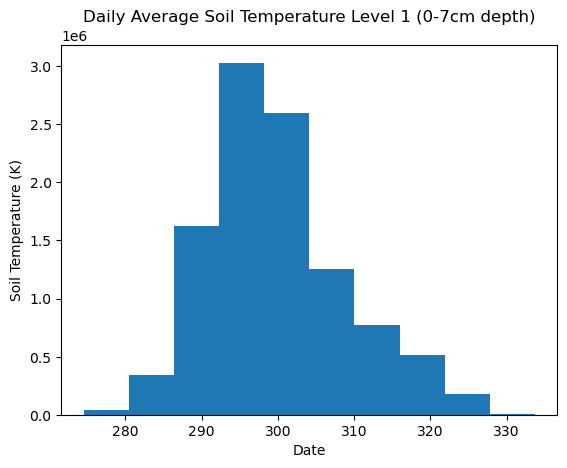

In [102]:
# Seasonal patterns
ds['stl1'].groupby('time').mean().plot()
plt.title('Daily Average Soil Temperature Level 1 (0-7cm depth)')
plt.xlabel('Date')
plt.ylabel('Soil Temperature (K)')
plt.show()

* Next steps are to merge these datasets together for further analysis and visualizations

In [63]:
# Ensure both sides have the same dtype
fires_daily['acq_date'] = pd.to_datetime(fires_daily['acq_date'])
climate_daily['date'] = pd.to_datetime(climate_daily['date'])

# Merge once
daily_data = (
    fires_daily
    .merge(climate_daily, left_on='acq_date', right_on='date', how='left')
)

# Only drop if 'date' still exists
if 'date' in daily_data.columns:
    daily_data = daily_data.drop(columns=['date'])


In [66]:
fires_daily['year'] = fires_daily['acq_date'].dt.year

fires_yearly = (
    fires_daily.groupby('year').sum(numeric_only=True).reset_index()
)


In [67]:
merged_yearly = fires_yearly.merge(df_treecover, on='year', how='left')


In [68]:
# Saving cleaned datasets to CSV wrt to time
# Daily merged dataset (fires + climate)
daily_data.to_csv("fires_climate_daily.csv", index=False)

# Yearly aggregated fires
fires_yearly.to_csv("fires_yearly.csv", index=False)

# Yearly merged (fires + treecover)
merged_yearly.to_csv("fires_treecover_yearly.csv", index=False)


In [ ]:
daily_data.head()



,year,fire_count,mean_frp,iso,adm1,loss_ha,loss_from_fire_ha
0,2015,6528,4840.596837,USA,6,6077.228782,1512.646372
1,2016,17172,9291.881808,USA,6,8550.436853,6013.948457
2,2017,11904,7705.850570,USA,6,9004.091206,5315.206947
3,2018,12935,2614.909761,USA,6,31348.825306,28699.560318
4,2019,2867,2277.427486,USA,6,18475.138250,10105.894241


In [70]:
fires_yearly.head() 

,year,fire_count,mean_frp
0,2015,6528,4840.596837
1,2016,17172,9291.881808
2,2017,11904,7705.850570
3,2018,12935,2614.909761
4,2019,2867,2277.427486


In [103]:
merged_yearly.head()

,year,fire_count,mean_frp,iso,adm1,loss_ha,loss_from_fire_ha
0,2015,6528,4840.596837,USA,6,6077.228782,1512.646372
1,2016,17172,9291.881808,USA,6,8550.436853,6013.948457
2,2017,11904,7705.850570,USA,6,9004.091206,5315.206947
3,2018,12935,2614.909761,USA,6,31348.825306,28699.560318
4,2019,2867,2277.427486,USA,6,18475.138250,10105.894241


## Data Visualizations 

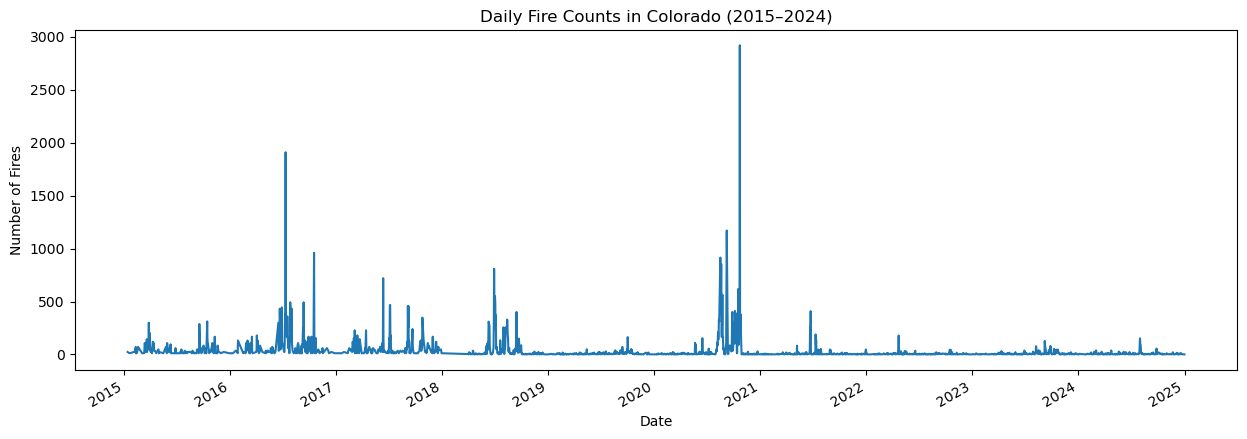

In [72]:
# Time Series of Daily Fire Counts
daily_data.groupby('acq_date')['fire_count'].sum().plot(figsize=(15,5))
plt.title("Daily Fire Counts in Colorado (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Number of Fires")
plt.show()

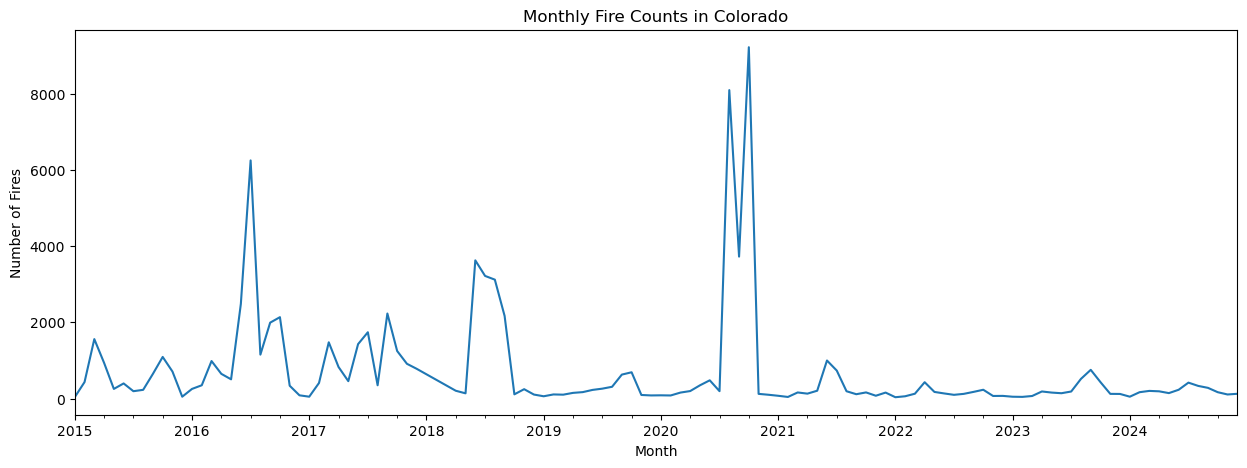

In [73]:
# Time Series of monthly fire counts
monthly_fires = daily_data.groupby(daily_data['acq_date'].dt.to_period('M'))['fire_count'].sum()
monthly_fires.plot(figsize=(15,5))
plt.title("Monthly Fire Counts in Colorado")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.show()

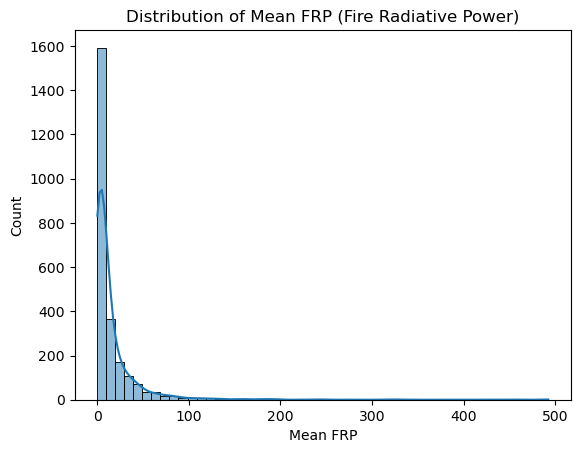

In [74]:
# Fire Radiative Power (FRP) Distribution
import seaborn as sns

sns.histplot(daily_data['mean_frp'], bins=50, kde=True)
plt.title("Distribution of Mean FRP (Fire Radiative Power)")
plt.xlabel("Mean FRP")
plt.show()


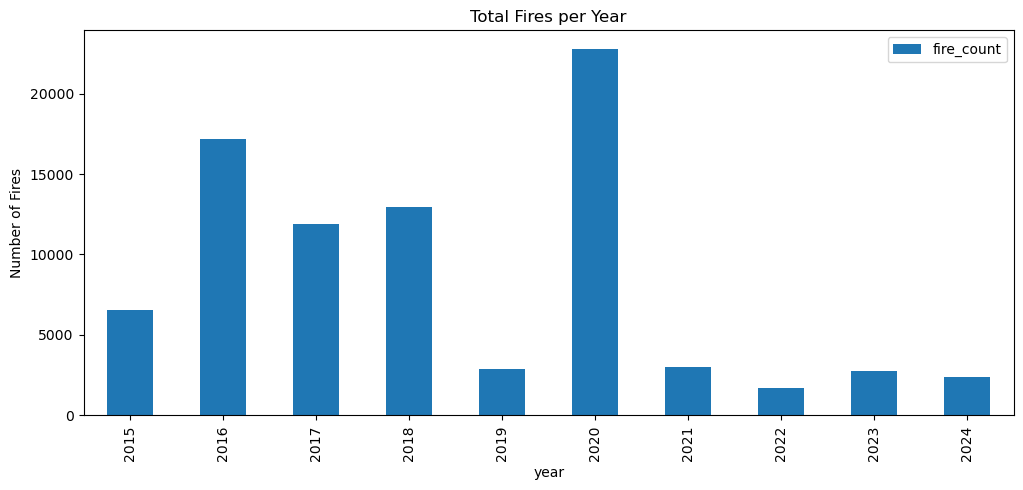

In [75]:
# Yearly Fire Counts
fires_yearly.plot(x='year', y='fire_count', kind='bar', figsize=(12,5))
plt.title("Total Fires per Year")
plt.ylabel("Number of Fires")
plt.show()


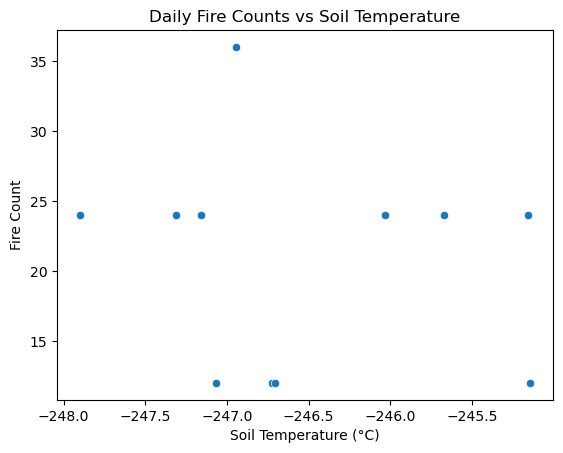

In [ ]:
# Soil Temperature vs Fire Counts
sns.scatterplot(data=daily_data, x='soil_temp_level_1', y='fire_count')
plt.title("Daily Fire Counts vs Soil Temperature")
plt.xlabel("Soil Temperature (°C)")
plt.ylabel("Fire Count")
plt.show()


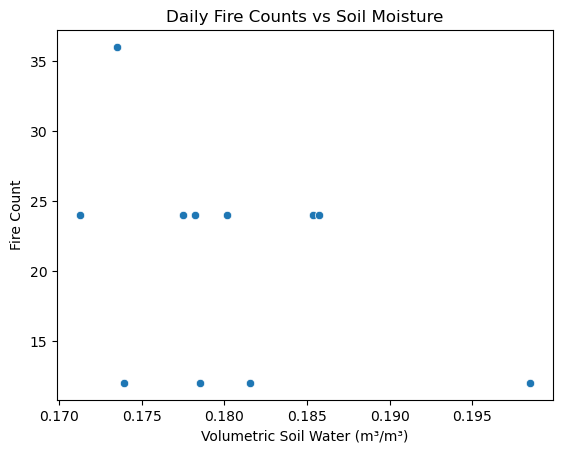

In [82]:
# Soil Moisture vs Fire Counts
sns.scatterplot(data=daily_data, x='soil_moisture_level_1', y='fire_count')
plt.title("Daily Fire Counts vs Soil Moisture")
plt.xlabel("Volumetric Soil Water (m³/m³)")
plt.ylabel("Fire Count")
plt.show()

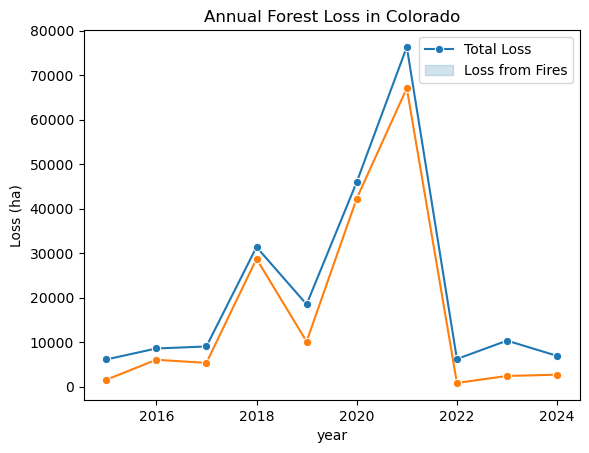

In [104]:
# Tree Cover Loss vs Year
sns.lineplot(data=merged_yearly, x='year', y='loss_ha', marker='o')
sns.lineplot(data=merged_yearly, x='year', y='loss_from_fire_ha', marker='o')
plt.title("Annual Forest Loss in Colorado")
plt.ylabel("Loss (ha)")
plt.legend(["Total Loss", "Loss from Fires"])
plt.show()


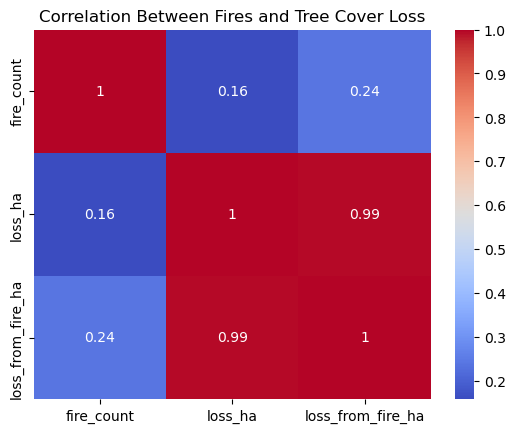

In [84]:
# Correlation Heatmap
corr = merged_yearly[['fire_count', 'loss_ha', 'loss_from_fire_ha']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Fires and Tree Cover Loss")
plt.show()


In [86]:
daily_data.head()

,acq_date,fire_count,mean_frp,soil_temp_level_1,soil_moisture_level_1
0,2015-01-14,24,13.55,NaN,NaN
1,2015-01-20,12,25.80,NaN,NaN
2,2015-02-06,24,31.60,NaN,NaN
3,2015-02-08,24,24.95,NaN,NaN
4,2015-02-09,48,54.65,NaN,NaN


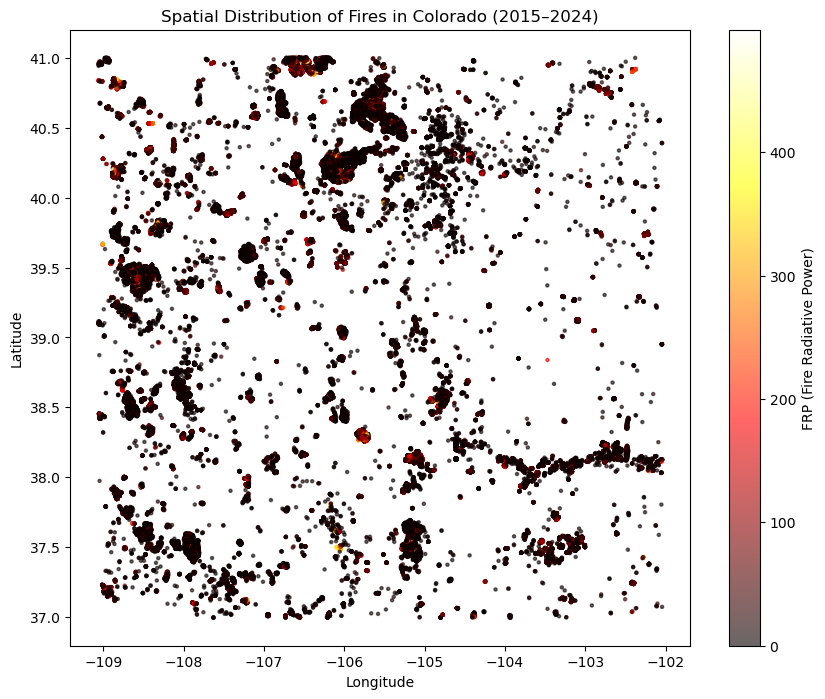

In [89]:
plt.figure(figsize=(10,8))
plt.scatter(df_firms['longitude'], df_firms['latitude'], 
            c=df_firms['frp'], cmap='hot', s=5, alpha=0.6)
plt.colorbar(label='FRP (Fire Radiative Power)')
plt.title("Spatial Distribution of Fires in Colorado (2015–2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
